# Introduction to Probability
---

## Probability

**Random variable** $x$ denotes a quantity that is uncertain and which can be either *discrete* or *continuous*.

---

**Probability distribution** $\Pr(x)$ captures the information of how likely a random variable is. A probability distribution of a discrete variable can be visualized by a histogram while the distribution of a continous variable can be visualized with the *probability densitiy function (pdf)*.

---

**Joint probability:** $\Pr(x,y)$, $\Pr(x,y,z), ...$: If we observe multiple paired instances of $x$ and $y$ some combinations occur more frequently.

---

**Marginalization:**

$\Pr(x) = \int \Pr(x,y)\partial y$ (continuous)

$\Pr(y) = \int \Pr(x,y)\partial x$

$\Pr(x) = \sum_{y} \Pr(x,y)$ (discrete)

$\Pr(y) = \sum_{x} \Pr(x,y)$

---

**Conditional probability:**
$\Pr(x \vert y)= \frac{\Pr(x,y)}{\Pr(y)} \\ 
\Leftrightarrow \Pr(x,y) \\ = \Pr(x \vert y)\Pr(y) \\
= \Pr(y \vert x)\Pr(x)$

---

**Bayes' Rule:**
$\Pr(y \vert x) = \frac{Pr(x \vert y)\Pr(y)}{\Pr(x)} \\
= \frac{Pr(x \vert y)\Pr(y)}{\int \Pr(x, y) dy} \\
= \frac{\Pr(x \vert y)\Pr(y)}{\int \Pr(x \vert y)\Pr(y) dy}$

---

**Independence:**
if $x$ tells us nothing about $y$, we can write:

$\Pr(x \vert y)=\Pr(x)$

$\Pr(y \vert x)=\Pr(y)$

$\Rightarrow \Pr(x,y)=\Pr(x \vert y)\Pr(y)=\Pr(x)\Pr(y)$

---

**Expectation:**
Given $f[\circ]$ that returns value $\forall$ possible values $x^*$

$\mathrm{E}[f[x]] = \sum_{x}f[x]\Pr(x)$ (discrete)

$\mathrm{E}[f[x]] = \int f[x]\Pr(x) \partial x$

(e.g.): $\mathrm{E}[f[x,y]] = \int \int f[x,y]\Pr(x,y) \partial x \partial y$

---

## Common probability distributions

**Bernoulli distribution:**

binary trial, $x\in \{0,1\}$

takes single parameter $\lambda \in [0, 1]$ which defines probability of observing a success $x=1$

$\Pr(x=0)=1-\lambda \\
\Pr(x=1)=\lambda \\
\Leftrightarrow \Pr(x)=\lambda^{x}(1-\lambda)^{1-x} \\
= \Pr(x) = \mathrm{Bern}_x[\lambda]$

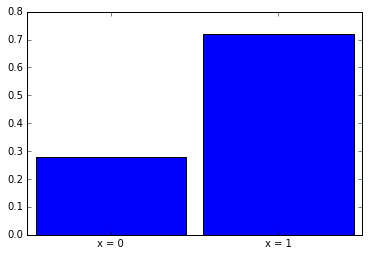

In [47]:
def bernoulli(lmbda):
    return 1 if random.random() < lmbda else 0

x = []
for i in range(100):
    x.append(bernoulli(0.7))
    
hist, bins = np.histogram(x, bins=2)
hist = hist / sum(hist)

plt.bar(
    left=[0, 1],
    height=hist,
    width=0.9,
    align='center',
    tick_label=["x = 0", 'x = 1'])
plt.show()

--- 
**Beta distribution**

Continuous distribution defined on a single variable $\lambda \in [0,1]$. (Can be used to represent uncertainty in the $\lambda$ parameter in a Bernoulli distribution)

$\Gamma[z]=\int_{0}^{\infty} t^{z-1}e^{-t} \partial t$, for positive integers: $\Gamma[z]=(z-1)!$ and $\Gamma[z+1]=z\Gamma[z]$

$\mathrm{Beta}_{\lambda}[\alpha,\beta]=\Pr(\lambda)
=\frac{\Gamma[\alpha+\beta]}{\Gamma[\alpha]\Gamma[\beta]} \lambda^{\alpha-1}(1-\lambda)^{\beta-1}$

$\mathrm{E}[\lambda] = \frac{\alpha}{\alpha+\beta}$

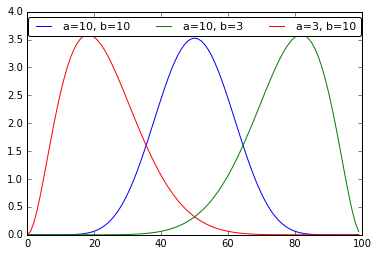

In [84]:
def Gamma(z):
    return math.factorial(z-1)

def gen_beta(alpha, beta):
    assert(alpha >= 0)
    assert(beta >= 0)
    p = Gamma(alpha + beta) / (Gamma(alpha) * Gamma(beta))
    a = alpha - 1
    b = beta - 1
    return lambda lmbda: p * math.pow(lmbda,a) * math.pow((1-lmbda),b)

beta1 = gen_beta(10, 10)
beta2 = gen_beta(10, 3)
beta3 = gen_beta(3, 10)
a = []
b = []
c = []
for i in np.arange(0, 1, 0.01):
    a.append(beta1(i))
    b.append(beta2(i))
    c.append(beta3(i))

a = plt.plot(a, label="a=10, b=10")
b = plt.plot(b, label="a=10, b=3")
c = plt.plot(c, label="a=3, b=10")
plt.legend(loc='upper center', ncol=3, fancybox=True, shadow=False, fontsize=11)
plt.show()

---
**Categorical distribution**

Discrete distribution that determines the probability of observing one of $K$ possible outcomes $\rightarrow$ Generalization of Bernoulli.

The probabilities of observig the $K$ outcomes are held in a $K \times 1$ parameter vector $\lambda=[\lambda_1,\lambda_2,...,\lambda_K]$ with $\lambda_k \in [0,1]$ and $\sum_{k=1}^K\lambda_k=1$

$\Pr(x=k)=\lambda_k$

$\textrm{Cat}_x[\lambda]$

---
**Dirichlet distribution**

Is defined over $K$ continuous values $\lambda_1...\lambda_K$ where $\lambda_k \in[0,1]$ and $s\sum_{}^{}$. It is suitable for defining a distribution over the parameters of the categorical distribution.

In $K$ dimensions the Dirichlet distribution has $K$ parameters $\alpha_1...\alpha_K$ each of which can take any positive value. The relative values of the parameters determine the expected values $\mathrm{E}[\lambda_1]...\mathrm{E}[\lambda_K]$. The absolute values determine the concentration around the expected value.

$\mathrm{Dir}_{\lambda_{1...K}}[\alpha_{1...K}] = \Pr(\lambda_{1...K})=\frac{\Gamma[\sum_{k=1}^K \alpha_k]}{\prod_{k=1}^K \Gamma[\alpha_k]} \prod_{k=1}^K \lambda_k^{\alpha_k-1}$

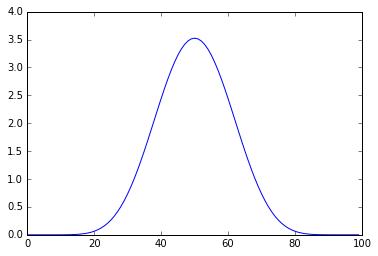

In [103]:
def gen_dirichlet(alphas):
    for a in alphas:
        assert(a >= 0)
    alphas_gamma = np.array([Gamma(a) for a in alphas])
    p = Gamma(sum(alphas)) / np.prod(alphas_gamma)
    def dirichlet(lambdas):
        assert(len(lambdas) == len(alphas))
        K = len(lambdas)
        prod = 1
        for k in range(K):
            prod *= math.pow(lambdas[k], alphas[k] - 1)
        return p * prod
    
    return dirichlet

dirichlet1 = gen_dirichlet([10, 10])
a = []
for i in np.arange(0, 1, 0.01):
    a.append(dirichlet1([i, 1-i]))
    
plt.plot(a)
plt.show()

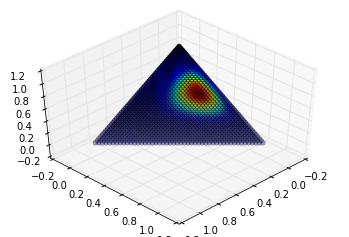

In [169]:
# 3d-Dirichlet
dirichlet2 = gen_dirichlet([3, 6, 8])

lambdas = []
result = []
for l1 in np.arange(0, 1, 0.02):
    for l2 in np.arange(0, 1, 0.02):
        for l3 in np.arange(0, 1, 0.02):
            s = l1+l2+l3
            if s > 0.999 and s < 1.0001:
                #lambdas.append([l1, l2, l3])
                d = dirichlet2([l1, l2, l3])
                if d != 0:
                    result.append([l1, l2, l3, d])

R = np.array(result)    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = R[:,0]
y = R[:,1]
z = R[:,2]
v = R[:,3]

ax.scatter(x,y,z, c=v)
ax.view_init(45, 45)
plt.show()

---
**Univariate normal distribution**

Gaussian disribution, defined on continuous values $x\in [-\infty, \infty]$. Two parameters, mean $\mu$ and variance $\sigma^2$, $\mu$ takes any value and determines the position of the peak, $\sigma^2$ takes only positive values and determines the width of the distribution.

$\mathrm{Norm}_x[\mu, \sigma^2]=\Pr(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \exp[-0.5 \frac{((x-\mu)^2}{\sigma^2}]$

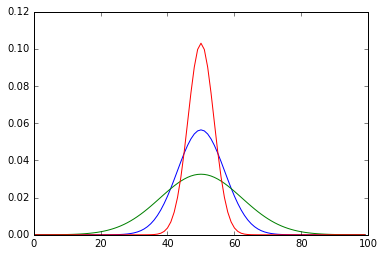

In [180]:
def gen_norm(mu, sigma_sq):
    p = 1 / math.sqrt(2 * math.pi * sigma_sq)
    return lambda x : p * math.exp(-0.5 * ((x-mu)**2)/sigma_sq)

norm1 = gen_norm(50, 50)
norm2 = gen_norm(50, 150)
norm3 = gen_norm(50, 15)
a = []
b = []
c = []
for i in range(100):
    a.append(norm1(i))
    b.append(norm2(i))
    c.append(norm3(i))

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.show()

---
**Normal-scaled inverse gamma distribution**

Defined over a pair of continuous values, $\mu, \sigma^2$, the first which can take any value and the second of which is constrained to be positive. As such, it can define a distribution over the mean and the variance parameters of the normal distribution.

It has four parameters, $\alpha, \beta, \gamma, \delta$ where $\alpha, \beta$ and $\gamma$ are positive real numbers but $\delta$ can take any value. It has *pdf*:

$\mathrm{NormInvGam}_{\mu,\sigma^2}[\alpha,\beta,\gamma,\delta]=\Pr(\mu, \sigma^2)=\frac{\sqrt{\gamma}}{\sigma\sqrt{2\pi}} \frac{\beta^{\alpha}}{\Gamma[\alpha]} (\frac{1}{\sigma^2})^{\alpha+1} \exp[-\frac{2\beta+\gamma(\delta-\mu)^2}{2\sigma^2}]$


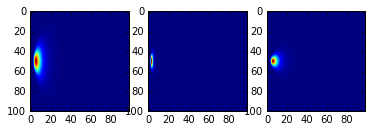

In [214]:
def gen_normInvGam(a, b, c, d):
    assert(a >= 0)
    assert(b >= 0)
    assert(c >= 0)
    t_2 = (b**a)/Gamma(a)
    def normInvGam(mu, sigma_sq):
        sigma = math.sqrt(sigma_sq)
        t_1 = math.sqrt(c) / (sigma * math.sqrt(2 * math.pi))
        t_3 = (1 / sigma_sq) ** (a+1)
        t_4 = math.exp(- (2 * b + c * (d-mu)**2)/(2 * sigma_sq))
        return t_1 * t_2 * t_3 * t_4
        
    return normInvGam

normInvGam1 = gen_normInvGam(1,1,1,0)
normInvGam2 = gen_normInvGam(5,1,1,0)
normInvGam3 = gen_normInvGam(1,1,5,0)


mu = np.arange(-5, 5, 0.1)
sigma = np.arange(0.1, 10, 0.1)

R1 = np.zeros((len(mu), len(sigma)))
R2 = np.zeros((len(mu), len(sigma)))
R3 = np.zeros((len(mu), len(sigma)))
for y,m in enumerate(mu):
    for x,s in enumerate(sigma):
        R1[y,x] = normInvGam1(m, s**2)
        R2[y,x] = normInvGam2(m, s**2)
        R3[y,x] = normInvGam3(m, s**2)


fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(R1)
fig.add_subplot(1, 3, 2)
plt.imshow(R2)
fig.add_subplot(1, 3, 3)
plt.imshow(R3)
plt.show()

---
**Multivariate normal distribution**

Models $D$-dimensional variables $x$ where each of the $D$ elements $x_1,...,x_D$ is continuous and lies in the range $[-\infty, \infty]$.

The distribution has two parameters, mean $\mu$ and covariance $\Sigma$.

$\mu$ is a $D \times 1$ vector that describes the mean of the distribution.

$\Sigma$ is a symmetric $D\times D$ positive definite matrix so that $z^T \Sigma z$ is positive for any real vector $z$. 

The *pdf* has following form:

$\mathrm{Norm}_x[\mu, \Sigma]=\Pr(x)=\frac{1}{(2\pi)^{\frac{D}{2}} |\Sigma|^{\frac{1}{2}}}\exp[-0.5 (x-\mu)^T \Sigma^{-1} (x-\mu)]$

---
**Normal inverse Wishart distribution**

Defines a distribution over a $D\times 1$ vector $\mu$ and a $D\times D$ positive definite matrix $\Sigma$. As such it is suitable to describe uncertainty in the parameters of a multivariant normal distribution.

The distribution has four parameters, $\alpha, \mathbf{\Psi}, \gamma, \mathbf{\delta}$ where $\alpha$ and $\gamma$ are positive scalars, $\delta$ is a $D\times 1$ vector and $\Psi$ is a a positive definite $D\times D$ matrix.

---

## Conjugacy

The beta distribution is *conjugate* to the Bernoulli distribution

The Dirichlet is *conjugate* to the categorical distribution

The normal-scaled inverse gamma is *conjugate* to the univariate normal distribution

(e.g.)
$\mathrm{Bern}_x[\lambda] \cdot \mathrm{Beta}_\lambda[\alpha, \beta]=k(x,\alpha, \beta)\cdot \mathrm{Beta}_\lambda[\tilde{\alpha},\tilde{\beta}]$

where $k$ is a scaling factor that is constant with respect to the variable of interest, $\lambda$.

## Problems:

**3.1**
Show that mean $\mathrm{E}[x] = \lambda$ and variance is $\mathrm{E}[(x-\mathrm{E})^2]=\lambda(1-\lambda)$ when $x$ is Bernoulli distributed.

$$\mathrm{Var}=\sum_{i=1}^{n}\Pr(i)(x_i-\mu)^2$$ (discrete)

$$\mathrm{E}[\mathrm{Bern}_x[\lambda]]\\
= \sum_{x}x  \Pr(x)\\
= \sum_x x  \lambda^x(1-\lambda)^{1-x}\\
= 0 + 1 * \lambda * 1 = \lambda$$ [QED]

$$\mathrm{Var}[\mathrm{Bern}_x[\lambda]]\\
= \mathrm{E}[(x-\lambda)^2]\\
= \lambda(1-\lambda)^2 + (1-\lambda)(0-\lambda)^2\\
= \lambda(\lambda^2-2\lambda+1) + (1-\lambda)\lambda^2\\
= \lambda^3-2\lambda^2+\lambda + \lambda^2+\lambda^3\\
= \lambda^2+\lambda= \lambda(1-\lambda)$$ [QED]

---

**3.3**

Mean and variance for the beta distribution are given by expressions:

$$\mathrm{E}[\lambda]=\mu=\frac{\alpha}{\alpha+\beta}\\
\mathrm{E}[(\lambda-\mu)^2]=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

Step 1: use $\alpha$ and $\mu$ to generate $\beta$
Step 2: use $\mu$ and $\sigma^2$ to generate $\alpha$

generate $\beta$ from $\mu$ and $\alpha$:
$$\mu=\frac{\alpha}{\alpha+\beta}\\
\Rightarrow \beta=\frac{-\alpha(\mu-1)}{\mu}$$

substitute $\beta$ in $\sigma^2$:
$$\sigma^2=\frac{\alpha(\frac{-\alpha(\mu-1)}{\mu})}{(\alpha + \frac{-\alpha(\mu-1)}{\mu})^2(\alpha+\frac{-\alpha(\mu-1)}{\mu} + 1)} \\
= \frac{-\frac{\alpha^2(\mu-1)}{\mu}}{\frac{\alpha^2}{\mu^2} (\frac{\alpha}{\mu} + 1)}\\
= - \frac{(\mu-1)\mu}{\frac{\alpha}{\mu}+1}$$

change formula to find $\alpha$:
$$\Rightarrow - \frac{(\mu-1)\mu}{\frac{\alpha}{\mu}+1} = \sigma^2 \biggr\vert * (\frac{\alpha}{\mu}+1)\\
= -(\mu-1)\mu = \sigma^2 (\frac{\alpha}{\mu}+1) = \frac{\alpha \sigma^2}{\mu} + \sigma^2 \biggr\vert - \sigma^2\\
= -(\mu - 1) \mu - \sigma^2= \frac{\alpha \sigma^2}{\mu} \biggr\vert * \mu\\
= -(\mu-1)\mu^2-\sigma^2\mu = \alpha \sigma^2 \biggr\vert /\sigma^2\\
\Rightarrow \frac{-(\mu-1)\mu^2}{\sigma^2}-\mu=\alpha$$

In [30]:
def to_beta(a, mu):
    return (-a * (mu - 1))/mu

def to_alpha(mu, ss):
    return (-((mu-1)*mu**2)/ss) - mu

def to_alpha_beta(mu, ss):
    alpha = to_alpha(mu, ss)
    beta = to_beta(alpha, mu)
    return alpha, beta

def mu(a, b):
    return a / (a+b)

def sigma_sq(a, b):
    t_1 = a * b
    t_2 = (a+b)**2
    t_3 = (a+b+1)
    return t_1 / (t_2 * t_3)

a1 = 10
b1 = 10
m = mu(a1, b1)
ss = sigma_sq(a1, b1)

print("Given alpha=" +str(a1) + " and beta=" +str(b1) + ":")
print("\tmu=" + str(m) + " and sigma^2=" + str(ss))

a2, b2 = to_alpha_beta(m, ss)
print("Given mu=" + str(m) + " and sigma^2=" + str(ss))
print("\talpha=" + str(a2) + " and beta=" + str(b))

Given alpha=10 and beta=10:
	mu=0.5 and sigma^2=0.011904761904761904
Given mu=0.5 and sigma^2=0.011904761904761904
	alpha=10.0 and beta=10.0


---
# Helpers and libraries

In [2]:
%matplotlib inline
import random
import math
import scipy.integrate as integrate
import numpy as np
import scipy.special as special
from numpy.random import normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from numpy.linalg import inv, norm